TSNE是另一种常用的数据降维方法。由T和SNE组成，也就是T分布和随机近邻嵌入

（Stochastic neighbour Embedding）。其主要优势在于高维数据空间中距离相近的点投

影到低维空间中仍然相近。

t-SNE(TSNE)将数据点之间的相似度转换为概率。原始空间中的相似度由高斯联合概率

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib as mpl

In [4]:
# 解決中文亂碼及負號顯示錯亂問題
mpl.rcParams['font.family'] = ['STSong']
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
wine_x, wine_y = datasets.load_wine(return_X_y=True)
wine_x = StandardScaler().fit_transform(wine_x)

In [6]:
print(wine_x.shape, wine_y)

(178, 13) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [9]:
tsne = TSNE(n_components=3, perplexity=25, early_exaggeration=3,
            random_state=123)
tsne_wine_x = tsne.fit_transform(wine_x) # 擬合並轉換(降維)


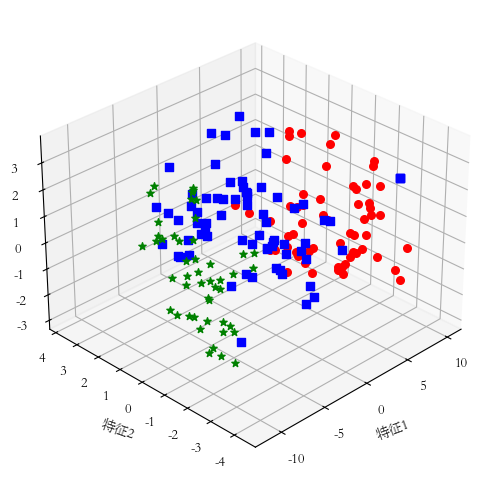

In [10]:
import matplotlib.pyplot as plt

colors = ['red','blue','green']
shapes = ['o','s','*']
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111, projection='3d')
for ii,y in enumerate(wine_y):
    ax1.scatter(tsne_wine_x[ii,0],tsne_wine_x[ii,1],tsne_wine_x[ii,2],
                s=30, c=colors[y],marker=shapes[y])
ax1.set_xlabel("特征1",rotation=20)
ax1.set_ylabel("特征2",rotation=-20)
ax1.set_zlabel("特征3",rotation=90)
ax1.azim = 225
plt.show()